<a href="https://colab.research.google.com/github/anjanarajuu/DATA-SCIENCE/blob/main/program12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df=pd.read_csv('/content/sample_data/california_housing_train.csv')
print(df.head())
print(df.isnull().sum())
print(df.describe())
print(df['latitude'].value_counts())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
med

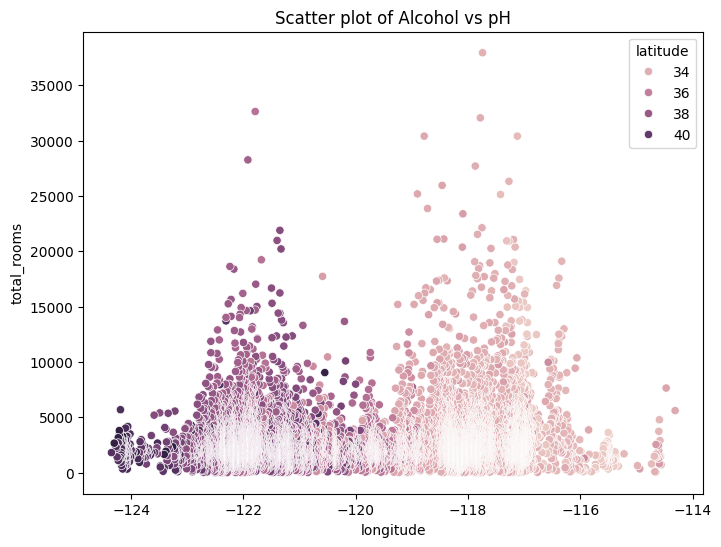

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude',y='total_rooms',hue='latitude',data=df)
plt.title("Scatter plot of Alcohol vs pH")
plt.show()


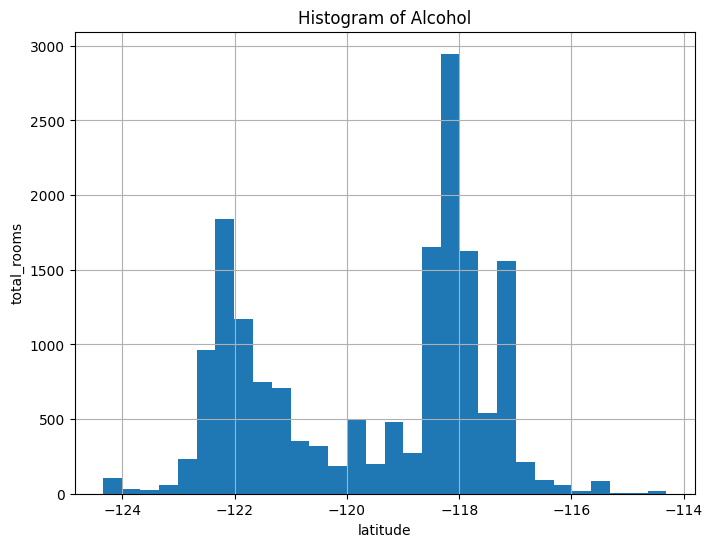

In [11]:
plt.figure(figsize=(8,6))
df['longitude'].hist(bins=30)
plt.title("Histogram of Alcohol")
plt.xlabel("latitude")
plt.ylabel("total_rooms")
plt.show()

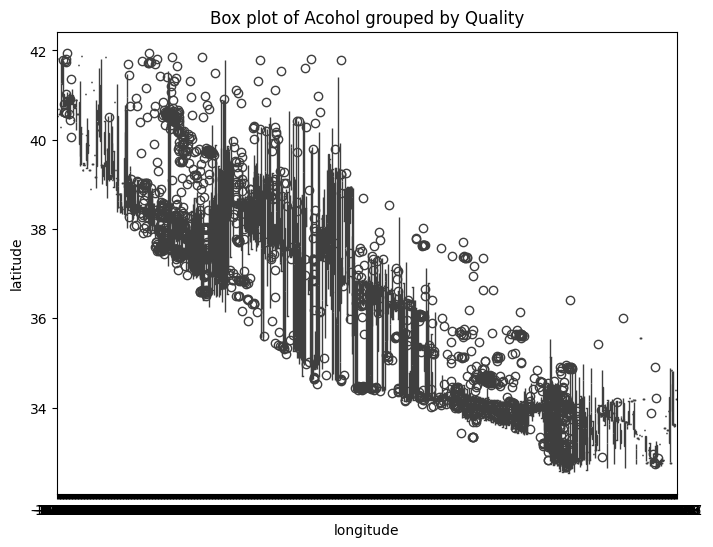

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='longitude',y='latitude',data=df)
plt.title("Box plot of Acohol grouped by Quality")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
df_cleaned=df.dropna()
X=df_cleaned.drop(['longitude','latitude'],axis=1)
y=df_cleaned['longitude']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
k_values=[1,3,5,7,9,11,13,15]
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled,y_train)
  y_pred=knn.predict(X_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"total_rooms{k}:{accuracy:.4f}")


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
k_values_input=input("Enter k values:")
k_values=[int (k.strip()) for k in k_values_input.split('.')]
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled,y_train)
  y_pred=knn.predict(X_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"Accuracy with k={k}: {accuracy:.4f}")

accuracy=accuracy_score(y_test,y_pred)*100
print(f"\nAccuracy: {accuracy:.2f}%")